# Image preprocessing

- Image data should probably be centered by subtracting the per-channel mean pixel values calculated on the training dataset.
- Training data augmentation should probably involve random rescaling, horizontal flips, perturbations to brightness, contrast, and color, as well as random cropping.
- Test-time augmentation should probably involve both a mixture of multiple rescaling of each image as well as predictions for multiple different systematic crops of each rescaled version of the image.

[source](https://machinelearningmastery.com/best-practices-for-preparing-and-augmenting-image-data-for-convolutional-neural-networks/)

also checkout https://docs.fast.ai/vision.augment NOT DONE YET

In [22]:
# Load image

import cv2
import numpy as np
from matplotlib import pyplot as plt

# current path cannot be read in jupyter notebooks, thats why I used this ugly
original_img = cv2.imread('/home/kilian/projects/focusfinder/download/images/0a0c1f65f19859c0.jpg', 0)

## Padding
all images have to be transformed to the same size in order to use one single cnn.
It would probably make sense to square them all, so that x and y have the same dimension.
The most important thing is that no part of the picture gets lost because of cropping because that would highly influece the result of the focus point.
Different ways to do that would be:
- fill missing pixels with 0
- fill missing pixels with black (should be same as 0)
- picture could be squezed and then the relative focus could be transfered to the real image 

"The best I've found to empirically work is zero-padding" [source](https://ai.stackexchange.com/questions/13832/how-should-we-pad-an-image-to-be-fed-in-a-cnn)

In [23]:
squared_img = square_img(original_img, [0,0,0])

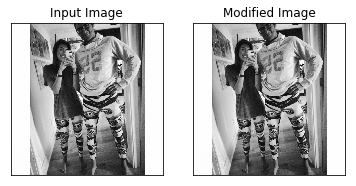

In [24]:
show_images(original_img, squared_img)

## Size scaling
which input size is the best to train a cnn
- 64x64
- 128x128 
- 256x256
- etc

In [40]:
pxl = 128
scaled_img = cv2.resize(squared_img, (pxl, pxl), interpolation = cv2.INTER_AREA)

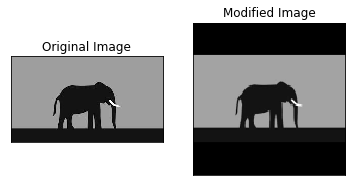

In [42]:
show_images(original_img, scaled_img)

## Data augmentation
can be done through
- inverse image
- ...

## Edge detection

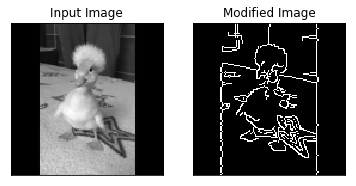

In [41]:
# Canny edge detection. 
edges = cv2.Canny(scaled_img,100,200)# (img, minVal,maxVal)

show_images(scaled_img, edges)

## Smoothing images

In [4]:
# 2D convolutional
kernel = np.ones((5,5),np.float32)/25
blur = cv2.filter2D(img,-1,kernel)

In [6]:
# image bluring
blur = cv2.blur(img,(5,5))

In [10]:
# gaussian blur (or smoothing)
blur = cv2.GaussianBlur(img,(5,5),0)

In [8]:
# bilater, gaussian with perserving edges, slower
blur = cv2.bilateralFilter(img,9,75,75)

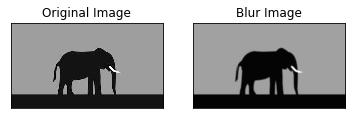

In [11]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,cmap = 'gray')
plt.title('Blur Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Functions

In [17]:
def show_images(img, modified_img):
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(modified_img,cmap = 'gray')
    plt.title('Modified Image'), plt.xticks([]), plt.yticks([])

    plt.show()

def square_img(img, value):
    width, height = img.shape

    if width < height:
        padding_width = 0
        padding_height = (height-width)/2
    elif width > height:
        padding_width = (width - height)/2
        padding_height = 0
    else:
        padding_width = 0
        padding_height = 0
    # add 0 to smaller dim so that it is squared
    constant = cv2.copyMakeBorder(img, padding_height, padding_height, padding_width, padding_width, cv2.BORDER_CONSTANT, value=value)
    return constant

# Resources

https://machinelearningmastery.com/best-practices-for-preparing-and-augmenting-image-data-for-convolutional-neural-networks/

https://towardsdatascience.com/boost-your-cnn-image-classifier-performance-with-progressive-resizing-in-keras-a7d96da06e20